In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler


In [94]:
# Load dataset
df = pd.read_csv('train_ML_IOT.csv')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [96]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [97]:
df.head()

,DateTime,Junction,Vehicles,ID
0,11/1/2015 0:00,1,15,20151101001
1,11/1/2015 1:00,1,13,20151101011
2,11/1/2015 2:00,1,10,20151101021
3,11/1/2015 3:00,1,7,20151101031
4,11/1/2015 4:00,1,9,20151101041


In [98]:
df.isna().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [99]:
df.duplicated().sum()

0

In [100]:
for col in df.columns:
    print(f"Unique values in '{col}':\n{df[col].unique()}\n")

Unique values in 'DateTime':
['11/1/2015 0:00' '11/1/2015 1:00' '11/1/2015 2:00' ... '6/30/2017 21:00'
 '6/30/2017 22:00' '6/30/2017 23:00']

Unique values in 'Junction':
[1 2 3 4]

Unique values in 'Vehicles':
[ 15  13  10   7   9   6   8  11  12  17  16  20  19  14  22  32  31  35
  26  34  30  27  24  29  21  18  33  28  25  23  40  38  36  48  43  41
  37  39  42  44  47  50  45  46  70  54  52  55  49  58  64  62  51  53
  61  56  57  63  59  60  67  76  79  66  65  68  69  86  73  77  74  71
  72  78   5  81  75  80  82  89  83  93  91  85  90  84  87  94  92 106
  98  88  96 120  97 104  95 100 112 103 105 143 134 135 141 156 110 102
  99 132 124 113 109 115 101 108 114 107 111 136 129 118 116 123 133 128
 117 121 127 140 126 122 119   2   4   3   1 125 180 173 162]

Unique values in 'ID':
[20151101001 20151101011 20151101021 ... 20170630214 20170630224
 20170630234]



In [101]:
# Convert DateTime to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [103]:
print("Date range:", df['DateTime'].min(), "to", df['DateTime'].max())

Date range: 2015-11-01 00:00:00 to 2017-06-30 23:00:00


In [104]:
df['Year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['Week'] = df['DateTime'].dt.isocalendar().week  # Week of the year
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute


In [105]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,month,Week,Day,Hour,Minute
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,44,1,0,0
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,44,1,1,0
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,44,1,2,0
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,44,1,3,0
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,44,1,4,0


# **Preprocessing**

# Transformation des Données

In [106]:
# Extract temporal features
df['DayOfWeek'] = df['DateTime'].dt.dayofweek  # 0=Monday, 6=Sunday
df['IsWeekend'] = df['DayOfWeek'] >= 5

In [107]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,month,Week,Day,Hour,Minute,DayOfWeek,IsWeekend
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,44,1,0,0,6,True
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,44,1,1,0,6,True
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,44,1,2,0,6,True
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,44,1,3,0,6,True
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,44,1,4,0,6,True


In [108]:
# Function to assign seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'automn'

df['Season'] = df['month'].apply(assign_season)

In [109]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,month,Week,Day,Hour,Minute,DayOfWeek,IsWeekend,Season
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,44,1,0,0,6,True,automn
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,44,1,1,0,6,True,automn
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,44,1,2,0,6,True,automn
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,44,1,3,0,6,True,automn
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,44,1,4,0,6,True,automn


In [110]:
df.tail()

,DateTime,Junction,Vehicles,ID,Year,month,Week,Day,Hour,Minute,DayOfWeek,IsWeekend,Season
48115,2017-06-30 19:00:00,4,11,20170630194,2017,6,26,30,19,0,4,False,Summer
48116,2017-06-30 20:00:00,4,30,20170630204,2017,6,26,30,20,0,4,False,Summer
48117,2017-06-30 21:00:00,4,16,20170630214,2017,6,26,30,21,0,4,False,Summer
48118,2017-06-30 22:00:00,4,22,20170630224,2017,6,26,30,22,0,4,False,Summer
48119,2017-06-30 23:00:00,4,12,20170630234,2017,6,26,30,23,0,4,False,Summer


In [111]:
df['IsWeekend'] = df['IsWeekend'].astype(int)


In [112]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Season' column
df['Season'] = label_encoder.fit_transform(df['Season'])

In [113]:
df.head()

,DateTime,Junction,Vehicles,ID,Year,month,Week,Day,Hour,Minute,DayOfWeek,IsWeekend,Season
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,44,1,0,0,6,1,3
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,44,1,1,0,6,1,3
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,44,1,2,0,6,1,3
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,44,1,3,0,6,1,3
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,44,1,4,0,6,1,3


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DateTime   48120 non-null  datetime64[ns]
 1   Junction   48120 non-null  int64         
 2   Vehicles   48120 non-null  int64         
 3   ID         48120 non-null  int64         
 4   Year       48120 non-null  int64         
 5   month      48120 non-null  int64         
 6   Week       48120 non-null  UInt32        
 7   Day        48120 non-null  int64         
 8   Hour       48120 non-null  int64         
 9   Minute     48120 non-null  int64         
 10  DayOfWeek  48120 non-null  int64         
 11  IsWeekend  48120 non-null  int32         
 12  Season     48120 non-null  int32         
dtypes: UInt32(1), datetime64[ns](1), int32(2), int64(9)
memory usage: 4.3 MB


# Normalisation et Structuration 

In [115]:
# Normalize 'Vehicles' column if needed (example: Min-Max scaling)
scaler = MinMaxScaler()
df['Vehicles'] = scaler.fit_transform(df[['Vehicles']])

In [116]:
# Save processed data for modeling
df.to_csv('processed_traffic_data.csv', index=False)

# **3. Exploratory Data Analysis (EDA)**

C:\Users\HP\AppData\Local\Temp\ipykernel_20576\3374978267.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


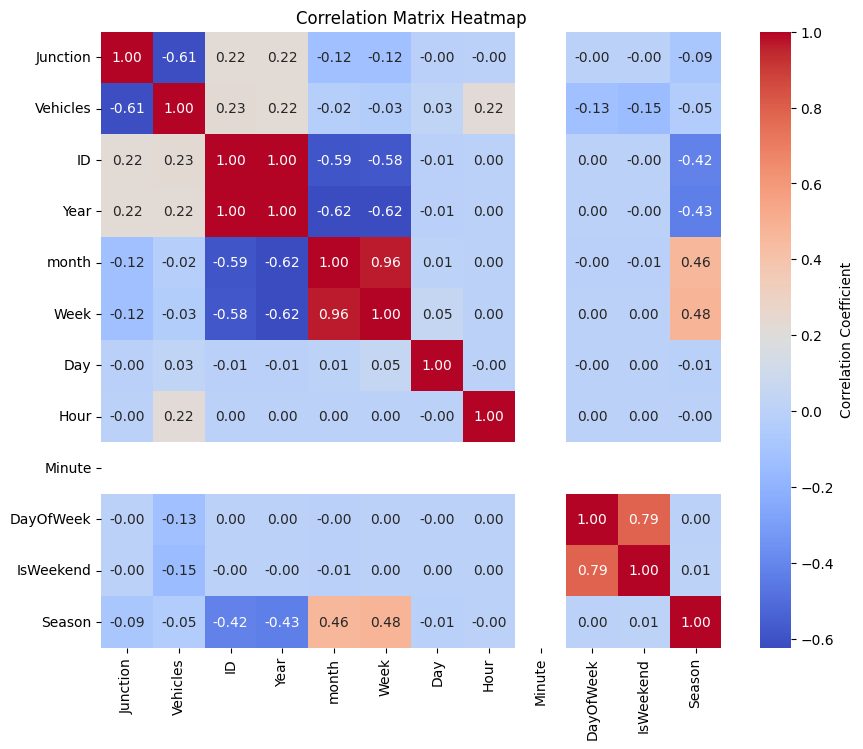

In [117]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix Heatmap')
plt.show()


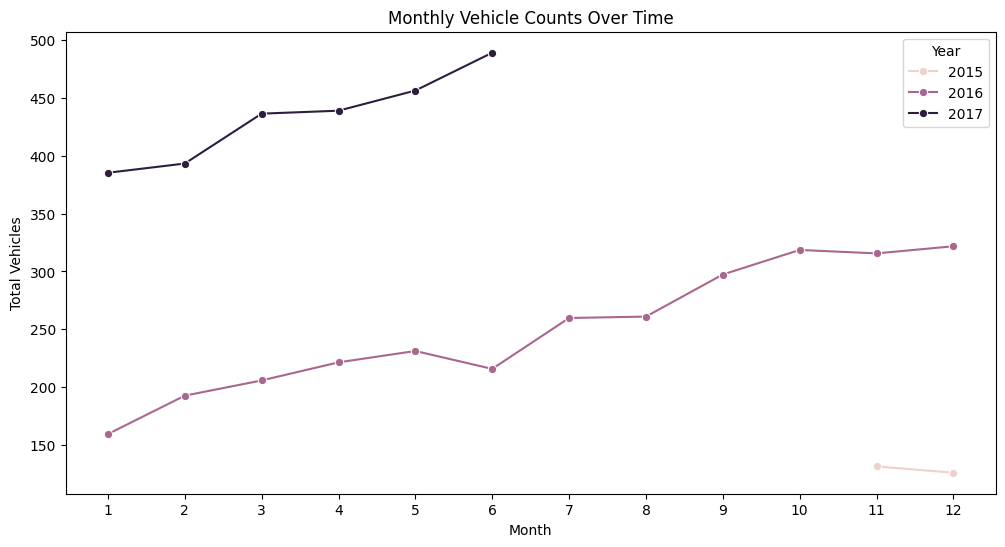

In [118]:
monthly_vehicle_counts = df.groupby(['Year', 'month'])['Vehicles'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_vehicle_counts, x="month", y="Vehicles", hue="Year", marker="o")
plt.title("Monthly Vehicle Counts Over Time")
plt.xlabel("Month")
plt.ylabel("Total Vehicles")
plt.legend(title="Year")
plt.xticks(range(1, 13))
plt.show()

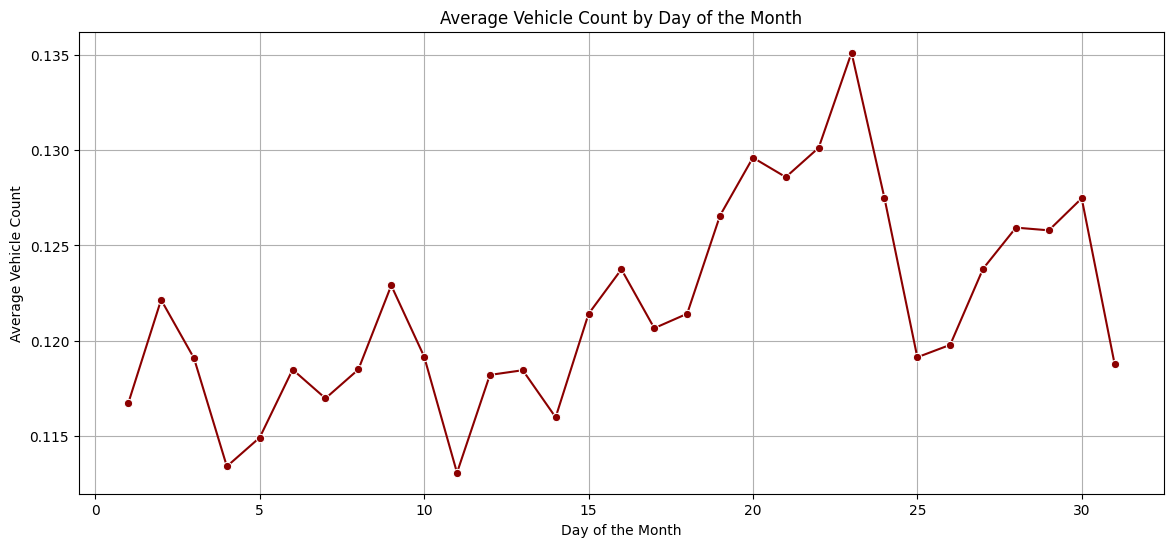

In [119]:
# Group data to get the average vehicle count per day
daily_avg_vehicles = df.groupby('Day')['Vehicles'].mean().reset_index()

# Plot the average vehicle count per day
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_avg_vehicles, x="Day", y="Vehicles", marker="o", color="darkred")

# Set plot titles and labels
plt.title("Average Vehicle Count by Day of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Average Vehicle Count")
plt.grid(True)
plt.show()


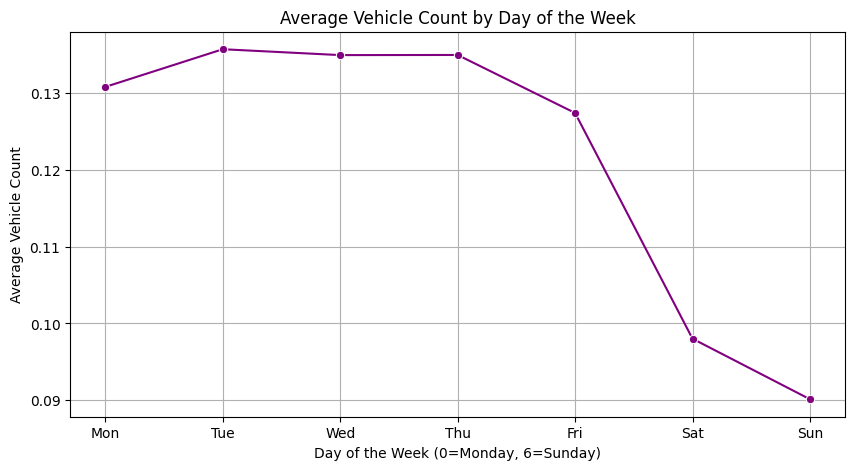

In [120]:
# Plotting the average vehicle count by day of the week using a line plot
plt.figure(figsize=(10, 5))
weekday_vehicle_counts = df.groupby('DayOfWeek')['Vehicles'].mean().reset_index()
sns.lineplot(data=weekday_vehicle_counts, x="DayOfWeek", y="Vehicles", marker="o", color="purple")

# Set plot titles and labels
plt.title("Average Vehicle Count by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Vehicle Count")
plt.grid(True)
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


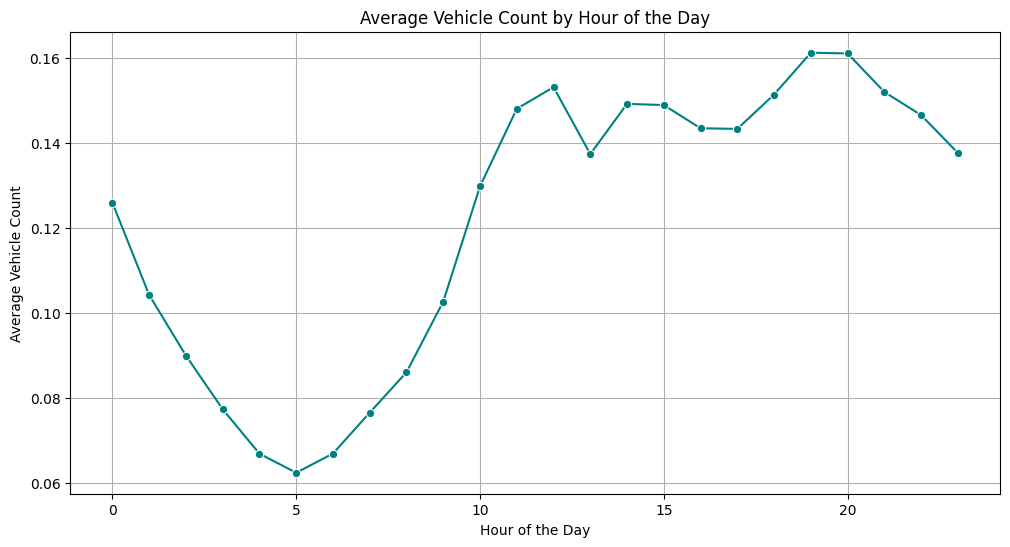

In [121]:
# Group data to get the average vehicle count per hour
hourly_avg_vehicles = df.groupby('Hour')['Vehicles'].mean().reset_index()

# Plot the average vehicle count per hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg_vehicles, x="Hour", y="Vehicles", marker="o", color="teal")

# Set plot titles and labels
plt.title("Average Vehicle Count by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Vehicle Count")
plt.grid(True)
plt.show()


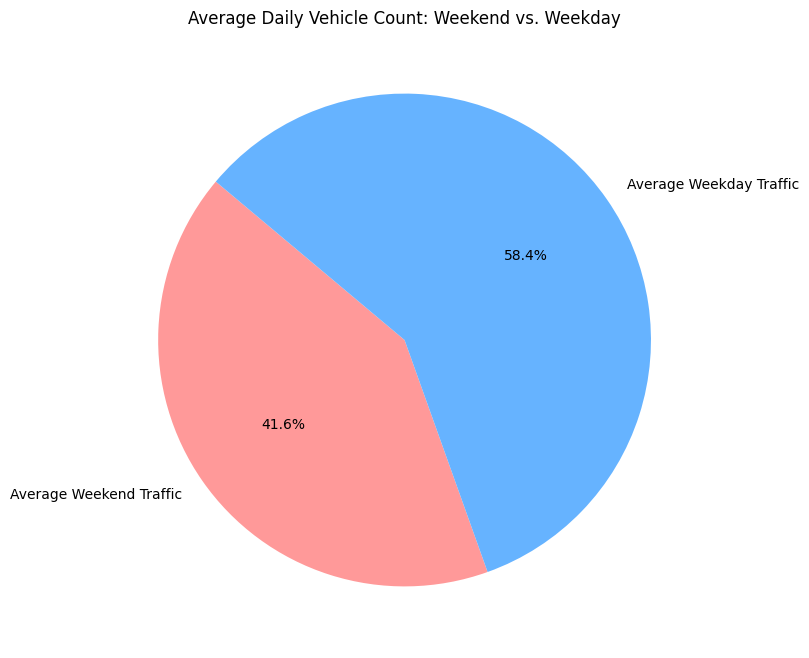

In [122]:
# Identify weekends (Saturday=5, Sunday=6)
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6])

# Calculate average daily vehicle count for weekends and weekdays
weekday_avg = df[~df['IsWeekend']].groupby(df['DateTime'].dt.date)['Vehicles'].mean().mean()
weekend_avg = df[df['IsWeekend']].groupby(df['DateTime'].dt.date)['Vehicles'].mean().mean()

# Prepare data for pie chart
labels = ['Average Weekend Traffic', 'Average Weekday Traffic']
sizes = [weekend_avg, weekday_avg]
colors = ['#ff9999', '#66b3ff']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Average Daily Vehicle Count: Weekend vs. Weekday")
plt.show()

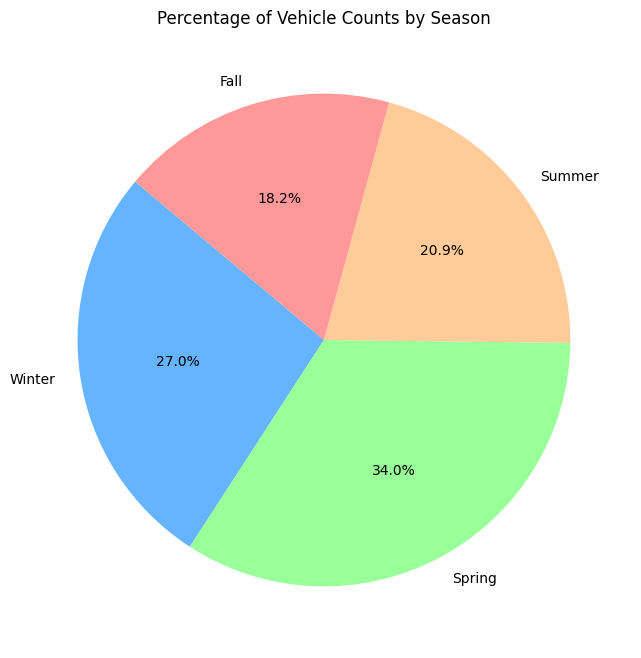

In [123]:


# Define a function to map each month to a season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Create a 'Season' column
df['Season'] = df['DateTime'].dt.month.apply(get_season)

# Aggregate the total number of vehicles by season
seasonal_totals = df.groupby('Season')['Vehicles'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(seasonal_totals, labels=seasonal_totals.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title("Percentage of Vehicle Counts by Season")
plt.show()


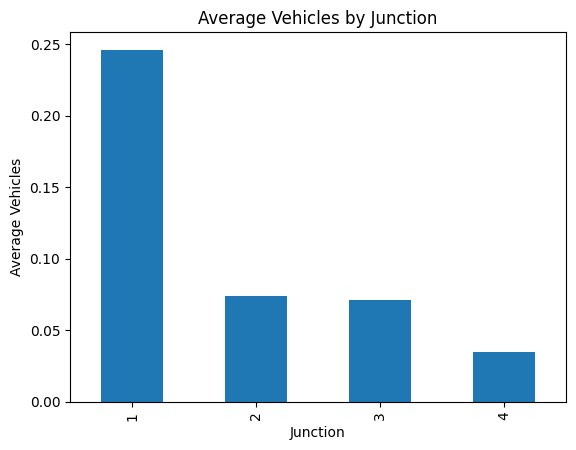

In [124]:
import matplotlib.pyplot as plt
df.groupby('Junction')['Vehicles'].mean().plot(kind='bar')
plt.xlabel('Junction')
plt.ylabel('Average Vehicles')
plt.title('Average Vehicles by Junction')
plt.show()


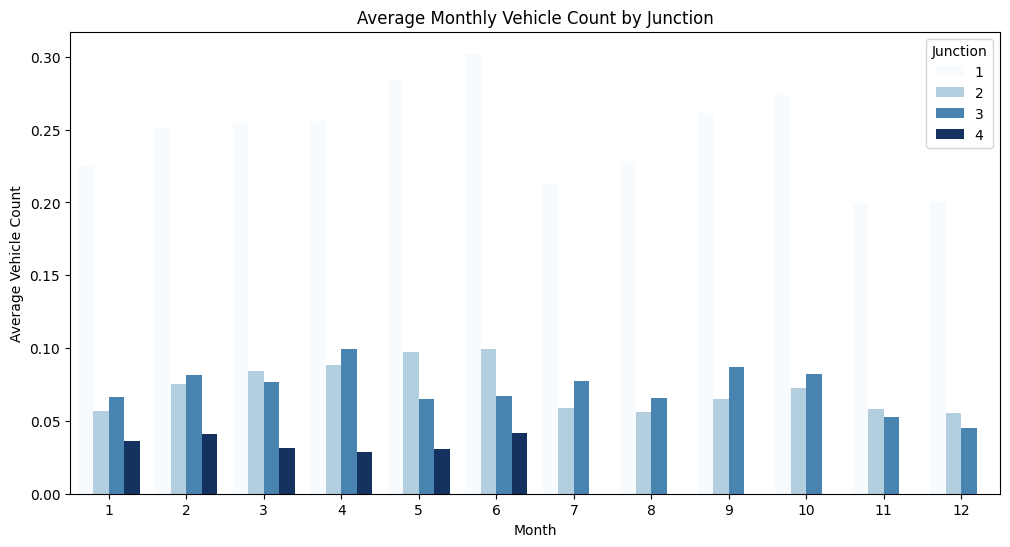

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data to get the average vehicle count by Month and Junction
monthly_avg_vehicles = df.groupby(['month', 'Junction'])['Vehicles'].mean().reset_index()

# Plotting the average vehicle count
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_avg_vehicles, x="month", y="Vehicles", hue="Junction", palette="Blues")

# Setting plot titles and labels
plt.title("Average Monthly Vehicle Count by Junction")
plt.xlabel("Month")
plt.ylabel("Average Vehicle Count")
plt.legend(title="Junction", loc="upper right")
plt.show()


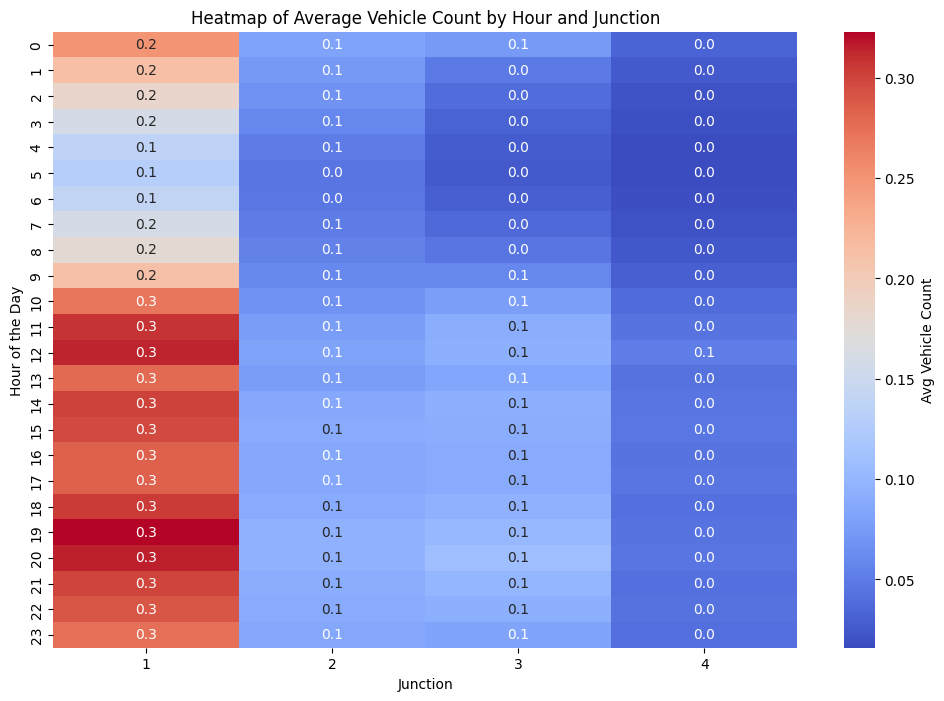

In [126]:
# Pivot table for heatmap: average vehicle count by hour and junction
hour_junction_pivot = df.pivot_table(values='Vehicles', index='Hour', columns='Junction', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hour_junction_pivot, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Avg Vehicle Count'})
plt.title('Heatmap of Average Vehicle Count by Hour and Junction')
plt.xlabel('Junction')
plt.ylabel('Hour of the Day')
plt.show()


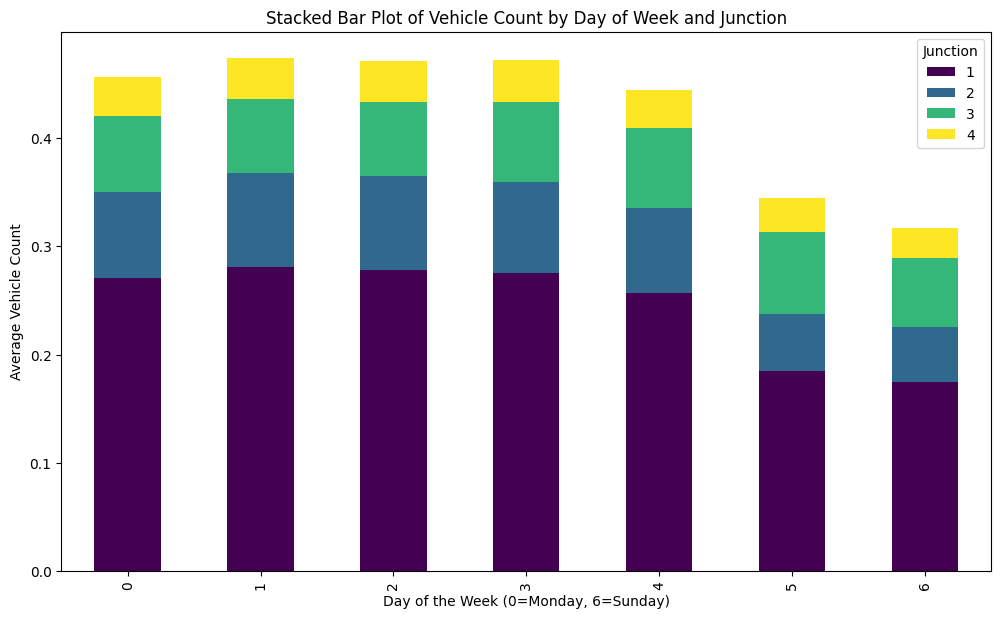

In [127]:
# Grouping data by junction and day of the week
junction_day_pivot = df.groupby(['DayOfWeek', 'Junction'])['Vehicles'].mean().unstack()

# Plotting the stacked bar plot
junction_day_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

# Setting plot labels and title
plt.title('Stacked Bar Plot of Vehicle Count by Day of Week and Junction')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Vehicle Count')
plt.legend(title='Junction')
plt.show()


# **Modeling and Prediction**

In [128]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Filter data for a single junction (example: Junction 1)
df_junction1 = df[df['Junction'] == 1].set_index('DateTime')['Vehicles']

# Fit ARIMA model
model = ARIMA(df_junction1, order=(5, 1, 0))  # ARIMA order (p, d, q) to be tuned
model_fit = model.fit()

# Forecast next 4 months
forecast = model_fit.forecast(steps=4 * 30 * 24)  # Adjust based on granularity (hourly/daily)
print(forecast)


c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


2017-07-01 00:00:00    0.407551
2017-07-01 01:00:00    0.401063
2017-07-01 02:00:00    0.397057
2017-07-01 03:00:00    0.395842
2017-07-01 04:00:00    0.397264
                         ...   
2017-10-28 19:00:00    0.402159
2017-10-28 20:00:00    0.402159
2017-10-28 21:00:00    0.402159
2017-10-28 22:00:00    0.402159
2017-10-28 23:00:00    0.402159
Freq: H, Name: predicted_mean, Length: 2880, dtype: float64


# **LTSM**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Prepare data for LSTM
df_lstm = df[df['Junction'] == 1].set_index('DateTime')['Vehicles']
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_lstm.values.reshape(-1, 1))

In [ ]:
# Create sequences
X, y = [], []
sequence_length = 30  # example: 30 timesteps
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length])
X, y = np.array(X), np.array(y)

In [ ]:
# Split into train and test sets
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Prédiction de la sortie unique (nombre de véhicules)

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
# Predict next 4 months
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Mean Squared Error: 0.005082395468521505


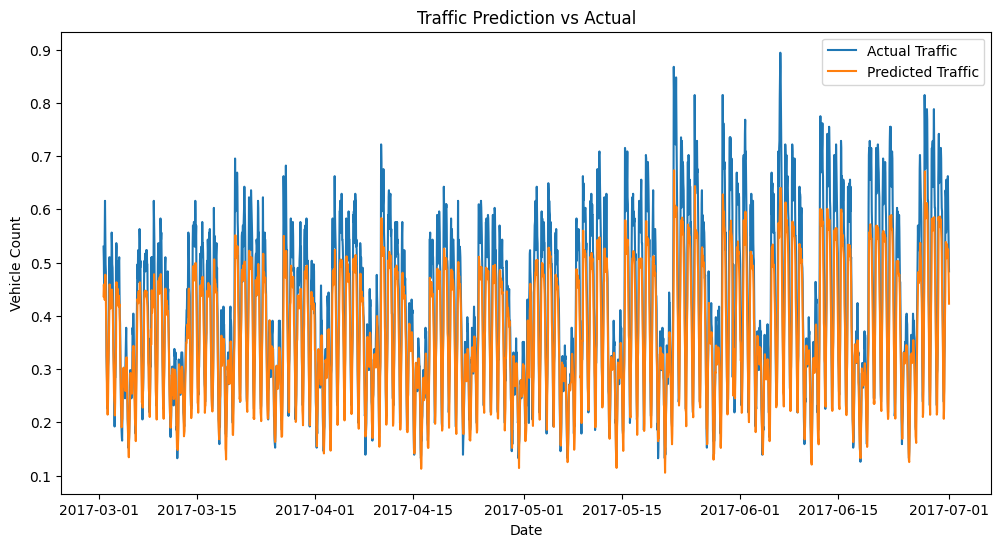

Recommendations:
1. Consider traffic signal adjustments during peak periods.
2. Implement alternative routing suggestions on high-traffic days.


In [137]:
# Evaluate accuracy (example: MSE for ARIMA)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Identify peak traffic periods (example: plotting predicted vs actual traffic)
plt.figure(figsize=(12, 6))
plt.plot(df_junction1.index[-len(predictions):], y_test, label='Actual Traffic')
plt.plot(df_junction1.index[-len(predictions):], predictions, label='Predicted Traffic')
plt.xlabel('Date')
plt.ylabel('Vehicle Count')
plt.title('Traffic Prediction vs Actual')
plt.legend()
plt.show()

# Highlight recommendations based on traffic peaks
# For example:
print("Recommendations:")
print("1. Consider traffic signal adjustments during peak periods.")
print("2. Implement alternative routing suggestions on high-traffic days.")


In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcul du MSE (Mean Squared Error)
print('MSE: %.5f' % (mean_squared_error(y_test, predictions)))

# Calcul du RMSE (Root Mean Squared Error)
print('RMSE: %.5f' % np.sqrt(mean_squared_error(y_test, predictions)))

# Calcul du MAE (Mean Absolute Error)
MAE = mean_absolute_error(y_test, predictions)
print('MAE: %.3f' % MAE)

# Calcul du MAPE (Mean Absolute Percentage Error)
MAPE = np.mean(np.abs(y_test - predictions) / np.abs(predictions))
print('MAPE: %.3f' % MAPE)

# Optionnel : Calcul du MASE (Mean Absolute Scaled Error)
# MASE = np.mean(np.abs(Y_test - Y_pred)) / (np.abs(np.diff(X_train)).sum() / (len(X_train) - 1))
# print('MASE: %.3f' % MASE)

# Calcul du R² (coefficient de détermination)
print('R^2 score: %.3f' % r2_score(predictions, y_test))

MSE: 0.00508
RMSE: 0.07129
MAE: 0.054
MAPE: 0.139
R^2 score: 0.631
